# Gradients and partials 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
def get_partials(func,x, y):
    delta = 0.001
    fx = (func(x+delta, y) - func(x,y))/ delta
    fy= (func(x, y+delta)-func(x,y))/delta
    return fx, fy
        

In [18]:
def grid(axis_lim):
    x = np.linspace(-axis_lim, axis_lim, 20)
    y = np.linspace(-axis_lim, axis_lim, 20)
    g1, g2 = np.meshgrid(x,y)
    return g1, g2

In [19]:
grid(10)

(array([[-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
          -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
          -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
           2.63157895,   3.68421053,   4.73684211,   5.78947368,
           6.84210526,   7.89473684,   8.94736842,  10.        ],
        [-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
          -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
          -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
           2.63157895,   3.68421053,   4.73684211,   5.78947368,
           6.84210526,   7.89473684,   8.94736842,  10.        ],
        [-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
          -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
          -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
           2.63157895,   3.68421053,   4.73684211,   5.78947368,
           6.84210526,   7.89473684,   8.94736842,  10.        ],
        [-10.        ,

In [23]:
def get_partials_from_grid(func, g1, g2):
    u = np.zeros(g1.shape)
    v = np.zeros(g2.shape)
    for row_id, (row_x, row_y) in enumerate(zip(g1,g2)):
        for col_id, (col_x, col_y) in enumerate(zip(row_x,row_y)):
            fx, fy = get_partials(func, col_x, col_y)
            u[row_id, col_id] = fx
            v[row_id, col_id] = fy
    
    return u, v          

In [24]:
def plot_gradients(g1,g2,u,v):
    fis, ax = plt.subplots()
    q = ax.quiver(g1,g2,u,v)
    plt.show()

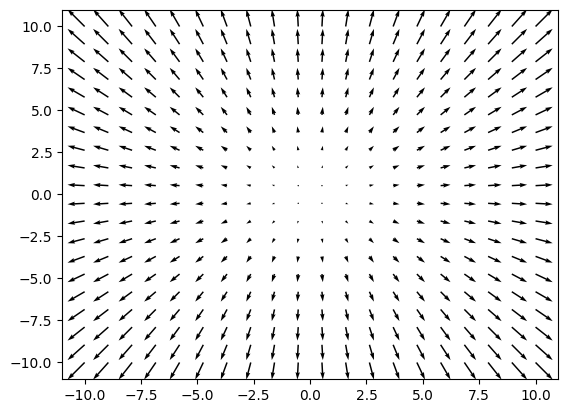

In [26]:
func = lambda x, y : x**2 + y**2
axis_lim = 10
g1, g2 = grid(axis_lim)
u,v = get_partials_from_grid(func, g1, g2)
plot_gradients(g1, g2, u, v)

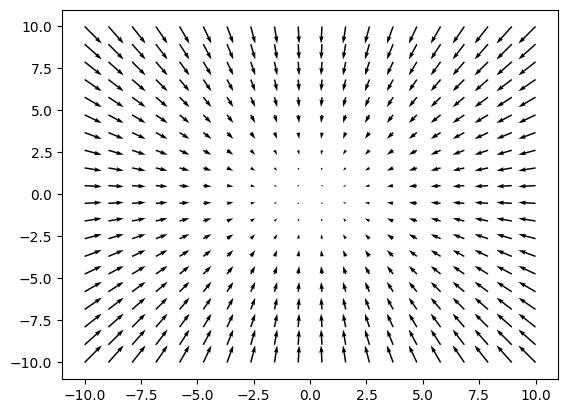

In [27]:
func = lambda x, y : x**2 + y**2
axis_lim = 10
g1, g2 = grid(axis_lim)
u,v = get_partials_from_grid(func, g1, g2)
plot_gradients(g1, g2, -u, -v)

# Gradient Descent

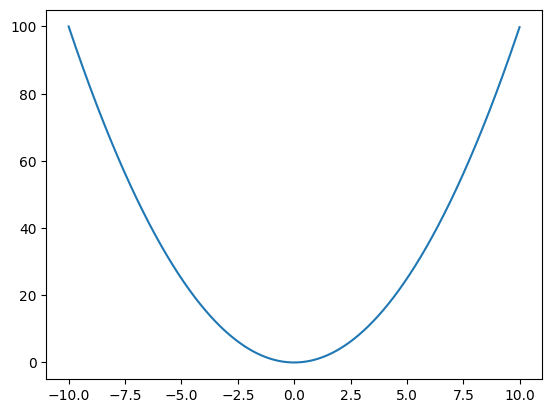

In [29]:
def f(x):
  ## Try changing this
  return x**2

## Plot f(x)
x = np.arange(-10, 10, 0.01)
y = f(x)

plt.figure()
plt.plot(x, y)
plt.show()

In [30]:
# This function takes derivative of f at point x
def derivative(x, f):
  delta = 0.0001
  return (f(x + delta) - f(x)) / delta

# This function does exactly one update to my parameter x
def one_step_gd(x, f, lr): # lr -> learning rate, same as \eta
  grad = derivative(x, f)
  new_x = x - lr * grad
  new_fx = f(new_x)
  return new_x, new_fx, grad

In [31]:
## Define the initial random guess
x0 = -5
num_steps = 0 # Same as t in the update equation

# Let us save all our steps.
xs = []
fxs = []
grads = []

-0.27492515816448626


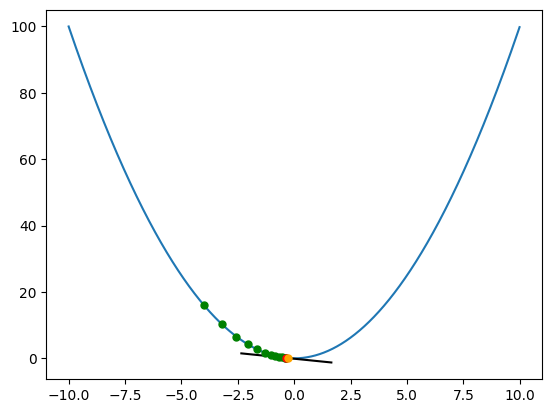

In [44]:
plt.figure()

# First, plot the function
x = np.arange(-10, 10, 0.01)
y = f(x)
plt.plot(x, y)

# Now apply gradient descent
new_x, new_fx, grad = one_step_gd(x0, f, 0.1)
xs.append(new_x)
fxs.append(new_fx)
grads.append(grad)
num_steps += 1

# Next, plot the old guess and the gradient at that point
t_c = f(x0) - grads[-1] * x0
delta = 2.
t_x = np.arange(x0 - delta, x0 + delta, 0.01)
t_y = grads[-1] * t_x + t_c
plt.plot(t_x, t_y, color="black")

# Next, plot the other guesses
for i in range(num_steps-1):
  plt.plot(xs[i], fxs[i], marker="o", markersize=5, markeredgecolor="green", markerfacecolor="green")

plt.plot(x0, f(x0), marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.plot(xs[-1], fxs[-1], marker="o", markersize=5, markeredgecolor="orange", markerfacecolor="orange")

print(new_x)
x0 = new_x
plt.show()

In [45]:
xs

[-4.000010000003158,
 -3.200017999998579,
 -2.560024399996692,
 -2.0480295199966037,
 -1.6384336159972435,
 -1.3107568927980218,
 -1.0486155142382891,
 -0.838902411390503,
 -0.6711319291123852,
 -0.5369155432899353,
 -0.4295424346319976,
 -0.3436439477056086,
 -0.27492515816448626]

In [46]:
fxs

[16.000080000125266,
 10.240115200314905,
 6.553724928578423,
 4.194424914777518,
 2.6844647140298026,
 1.7180836320175248,
 1.0995944967012317,
 0.7037572558368008,
 0.4504180662741116,
 0.28827830062632637,
 0.18450670314958392,
 0.11809116279469505,
 0.07558384259176779]

In [47]:
grads

[-9.99989999996842,
 -7.99992000004579,
 -6.399936000018869,
 -5.119948800000884,
 -4.095959039993602,
 -3.276767231992217,
 -2.6214137855973263,
 -2.097131028477861,
 -1.6777048227811786,
 -1.3421638582244988,
 -1.073731086579377,
 -0.8589848692638902,
 -0.6871878954112232]